# Theory
### Demand function
The following equation describes a simple demand function,

$$Q = \alpha P^\beta$$

where $Q$ = Quantity sold, $P$ = Price, $\beta$ = Price elasticity


### Price elasticity of demand
Price elasticity here is the rate of change in quantity sold w.r.t the rate of change in price. The demand function can be converted into a linear regression problem using a log transformation on both sides (log-log model),

$$\ln Q = \alpha + \beta \ln P + \epsilon$$


Solving for $Q$,

$$Q = e^{\alpha + \beta \ln P + \epsilon}$$


Partial differentiating the equation w.r.t $P$ gives,

$$\frac{dQ}{dP} = {\beta \over P} * e^{\alpha + \beta \ln P + \epsilon}$$

substituting value of Q,

$$\frac{dQ}{dP} = \beta {Q \over P}$$

price elasticity,

$$\beta = {\frac{dQ}{Q} \over \frac{dP}{P}}$$


### Optimal price
The marginal revenue as a function of price $P$ is given by the following formula,

$$MR = Q(P - C)$$

where $C$ = Cost price


substituting value of Q,

$$MR = \alpha P^\beta(P - C)$$

expanding,

$$MR = \alpha P^{\beta + 1} - \alpha P^\beta C$$


We want to find the optimal price which which will maximize $MR$. So we find the first derivative and assign it to zero,

$$MR'(P) = \alpha (\beta + 1)P^\beta - \alpha \beta P^{\beta - 1} C = 0$$

$$(\beta + 1)P^\beta = \beta P^{\beta - 1} C$$

dividing by $P^{\beta - 1}$,

$$(\beta + 1)P = \beta C$$

or optimal price,

$$P_{optimal} = {\beta C \over {\beta + 1}}$$


This of course can only be used in cases when the product is negatively elastic ($\beta < -1$)

# Code
### Load libraries

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.polynomial.polynomial import polyfit
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.linear_model import ElasticNetCV

### Define helper function

In [29]:
def optimize_price(price_beta, cost_price, profit_margin=1, penalty=0):
    """Optimize price using price elasticity"""
    
    return ((price_beta / (price_beta + 1)) * ((cost_price - penalty) / profit_margin))

### Load dataset

In [30]:
# Here eggs are the product in focus, with cookies being a competitor and ad type denoting whether a promo was run for eggs
data = pd.read_csv("supermarket.csv")
data.head()

,Sales,Price.Eggs,Ad.Type,Price.Cookies
0,18,4.77,0,4.74
1,20,4.67,0,4.81
2,23,4.75,0,4.36
3,23,4.74,0,4.29
4,23,4.63,0,4.17


### Split into independant and dependant variables

In [31]:
X = data.loc[:, ["Price.Eggs", "Ad.Type", "Price.Cookies"]]
y = data["Sales"]

### Explore data

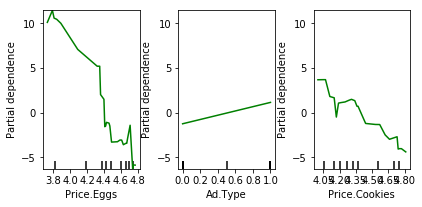

In [35]:
model = GradientBoostingRegressor()
model.fit(X, y)

plots = plot_partial_dependence(model,       
                                features=[0, 1, 2],
                                X=X,
                                feature_names=["Price.Eggs", "Ad.Type", "Price.Cookies"],
                                grid_resolution=50)

### Build cross-validated Elastic Net model

In [38]:
model = ElasticNetCV(l1_ratio=[.1, .5, .6, .7, .8, .9, .95, .99, 1], normalize=True, cv=10, n_jobs=-1)
model.fit(X, y)
print("R Squared: %s" % np.round(model.score(X, y), 2))

R Squared: 0.89


### Find optimal price for eggs

In [39]:
price_beta = model.coef_[0]
cost_price = X["Price.Eggs"].min()
price_optimal = optimize_price(price_beta, cost_price)
print("Optimal price: %s" % np.round(price_optimal, 2))

Optimal price: 3.98
